# 404 Autoencoder

View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:

* torch: 0.1.11
* matplotlib
* numpy

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib inline

In [2]:
# 
from torch.distributions.relaxed_bernoulli import RelaxedBernoulli
from pyro.distributions.relaxed_straight_through import RelaxedBernoulliStraightThrough

In [3]:
torch.manual_seed(1)    # reproducible
np.random.seed(1)

In [4]:
# Hyper Parameters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005         # learning rate
DOWNLOAD_MNIST = False
N_TEST_IMG = 5

In [5]:
# Mnist digits dataset
train_data = torchvision.datasets.FashionMNIST(
    root='./fashion-mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        # download it if you don't have it
)

torch.Size([60000, 28, 28])
torch.Size([60000])


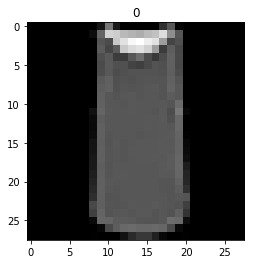

In [6]:
# plot one example
print(train_data.data.size())     # (60000, 28, 28)
print(train_data.targets.size())   # (60000)
plt.imshow(train_data.data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.targets[2])
plt.show()

In [7]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [8]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
#             nn.Tanh(),
#             nn.Linear(64, 12),
#             nn.Tanh(),
#             nn.Linear(12, 3),   # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
#             nn.Linear(3, 12),
#             nn.Tanh(),
#             nn.Linear(12, 64),
#             nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        better_encoded = RelaxedBernoulliStraightThrough(0.01, logits=encoded).sample()
        decoded = self.decoder(encoded)
        return better_encoded, decoded

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)
Epoch:  0 | train loss: 0.1788
tensor([[4.1560e-39, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00, 9.9997e-01,
         1.0000e+00],
        [4.1560e-39, 1.0000e+00, 1.0000e+00,  ..., 1.4547e-10, 4.1560e-39,
         1.0000e+00],
        [1.8135e-14, 4.1560e-39, 1.0000e+00,  ..., 4.1560e-39, 4.1560e-39,
         1.0000e+00],
        ...,
        [4.1560e-39, 3.1411e-33, 6.8650e-20,  ..., 1.0000e+00, 1.3671e-22,
         4.1560e-39],
        [4.1560e-39, 1.0000e+00, 4.1560e-39,  ..., 1.0000e+00, 1.0000e+00,
         5.4181e-38],
        [1.0000e+00, 1.9376e-03, 1.0000e+00,  ..., 2.0726e-14, 9.9997e-01,
         1.0000e+00]])


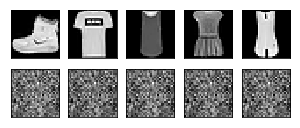

Epoch:  0 | train loss: 0.0256
tensor([[4.1560e-39, 1.1663e-10, 1.0000e+00,  ..., 1.0000e+00, 1.0000e+00,
         1.0000e+00],
        [4.1560e-39, 1.0000e+00, 4.1560e-39,  ..., 1.0000e+00, 1.0000e+00,
         2.1205e-01],
        [1.0000e+00, 1.0239e-18, 1.0000e+00,  ..., 9.7635e-01, 1.0000e+00,
         1.0000e+00],
        ...,
        [4.1560e-39, 1.0000e+00, 1.0000e+00,  ..., 4.1560e-39, 4.1560e-39,
         4.1560e-39],
        [4.1560e-39, 1.0000e+00, 4.1560e-39,  ..., 1.0000e+00, 1.0000e+00,
         3.1730e-03],
        [1.0000e+00, 1.0000e+00, 4.1560e-39,  ..., 1.0000e+00, 1.0000e+00,
         1.0000e+00]])


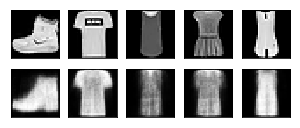

Epoch:  5 | train loss: 0.0117
tensor([[3.1373e-29, 1.0000e+00, 1.1559e-28,  ..., 4.1560e-39, 1.0000e+00,
         1.0000e+00],
        [4.1560e-39, 5.5816e-32, 4.1560e-39,  ..., 4.1560e-39, 1.0000e+00,
         4.1560e-39],
        [4.1560e-39, 4.1560e-39, 4.1560e-39,  ..., 4.1560e-39, 4.1560e-39,
         4.1560e-39],
        ...,
        [4.1560e-39, 1.0000e+00, 4.1560e-39,  ..., 1.0000e+00, 4.1560e-39,
         4.1560e-39],
        [4.0132e-28, 4.1560e-39, 4.4997e-17,  ..., 9.0667e-39, 4.1560e-39,
         7.7908e-39],
        [1.0000e+00, 4.9593e-25, 7.5763e-31,  ..., 4.1560e-39, 4.1560e-39,
         4.1560e-39]])


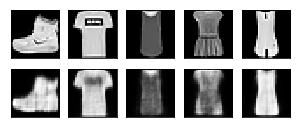

Epoch:  5 | train loss: 0.0116
tensor([[3.5465e-04, 4.1560e-39, 4.1560e-39,  ..., 1.3766e-29, 4.1560e-39,
         1.0000e+00],
        [4.1560e-39, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00, 9.6325e-25,
         1.8853e-19],
        [4.1560e-39, 9.9616e-01, 5.4620e-32,  ..., 4.1560e-39, 9.9990e-01,
         4.1560e-39],
        ...,
        [4.8113e-22, 3.3979e-03, 8.5741e-01,  ..., 1.0000e+00, 1.0000e+00,
         4.1560e-39],
        [4.1560e-39, 1.0000e+00, 1.0000e+00,  ..., 5.4547e-03, 1.0000e+00,
         1.0000e+00],
        [1.0000e+00, 4.1560e-39, 4.1560e-39,  ..., 1.0000e+00, 1.0000e+00,
         4.1560e-39]])


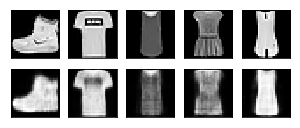

Epoch:  9 | train loss: 0.0109
tensor([[4.1560e-39, 1.0000e+00, 4.1560e-39,  ..., 9.4550e-12, 1.0000e+00,
         4.1560e-39],
        [1.0000e+00, 3.3122e-07, 1.0000e+00,  ..., 6.7914e-17, 1.0000e+00,
         4.1560e-39],
        [1.0000e+00, 4.1560e-39, 1.0000e+00,  ..., 1.0000e+00, 4.3041e-01,
         4.1560e-39],
        ...,
        [1.0000e+00, 1.1329e-03, 1.0000e+00,  ..., 1.0000e+00, 4.1560e-39,
         1.0000e+00],
        [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 1.0000e+00, 1.0000e+00,
         1.0000e+00],
        [6.6570e-26, 1.0000e+00, 9.9757e-01,  ..., 4.1560e-39, 1.0640e-06,
         1.5455e-10]])


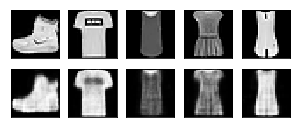

Epoch:  9 | train loss: 0.0146
tensor([[6.9140e-39, 7.7816e-26, 1.0000e+00,  ..., 1.0000e+00, 4.1560e-39,
         1.0000e+00],
        [4.1560e-39, 7.4570e-08, 1.0000e+00,  ..., 1.0000e+00, 4.1560e-39,
         4.1560e-39],
        [1.0000e+00, 1.0000e+00, 4.1560e-39,  ..., 1.0000e+00, 4.1560e-39,
         1.1431e-15],
        ...,
        [4.1560e-39, 1.0000e+00, 9.5316e-01,  ..., 2.0352e-08, 1.0000e+00,
         1.0000e+00],
        [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 4.1560e-39, 1.0000e+00,
         4.1560e-39],
        [1.0000e+00, 3.3395e-05, 1.0000e+00,  ..., 4.1560e-39, 4.1560e-39,
         4.1560e-39]])


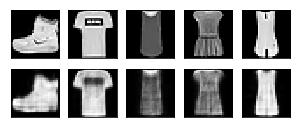

In [9]:
autoencoder = AutoEncoder()
print(autoencoder)

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

# original data (first row) for viewing
view_data = Variable(train_data.data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.)

for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x.view(-1, 28*28))   # batch x, shape (batch, 28*28)
        b_y = Variable(x.view(-1, 28*28))   # batch y, shape (batch, 28*28)
        b_label = Variable(y)               # batch label

        encoded, decoded = autoencoder(b_x)

        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients

        if step % 500 == 0 and epoch in [0, 5, EPOCH-1]:        
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.item())
            
            print(encoded)

            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            
            # initialize figure
            f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
            
            for i in range(N_TEST_IMG):
                a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())
    
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.show(); plt.pause(0.05)
            

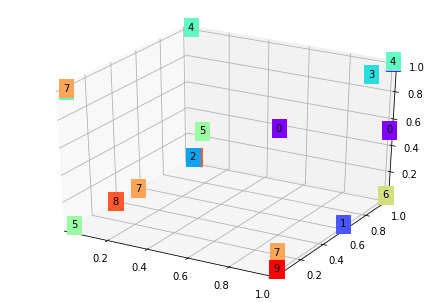

In [10]:
# visualize in 3D plot
view_data = Variable(train_data.data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.)
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data.data[:, 0].numpy(), encoded_data.data[:, 1].numpy(), encoded_data.data[:, 2].numpy()
values = train_data.targets[:200].numpy()
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()